In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [34]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
# 한글 폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

In [18]:
df_x = pd.read_csv('../../DB/x_변수병합_민주.csv', encoding='CP949')
df_y = pd.read_csv('../../DB/폐기물데이터_행정구역변경_2.csv', encoding='CP949')

In [8]:
print(set(df_x['행정구역'].unique())-set(df_y['행정구역'].unique()))
print(set(df_y['행정구역'].unique())-set(df_x['행정구역'].unique()))

set()
set()


In [10]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   행정구역          1145 non-null   object 
 1   시도            1145 non-null   object 
 2   시군구           1145 non-null   object 
 3   연도            1145 non-null   int64  
 4   주민등록세대수       1145 non-null   int64  
 5   총인구수          1145 non-null   int64  
 6   단독주택-계        1145 non-null   int64  
 7   아파트           1145 non-null   int64  
 8   연립주택          1145 non-null   int64  
 9   다세대주택         1145 non-null   int64  
 10  비주거용 건물 내 주택  1145 non-null   int64  
 11  단독주택비율        1145 non-null   float64
 12  아파트비율         1145 non-null   float64
 13  연립주택비율        1145 non-null   float64
 14  다세대주택비율       1145 non-null   float64
 15  비주거용주택비율      1145 non-null   float64
 16  1인가구          1145 non-null   int64  
 17  2인가구          1145 non-null   int64  
 18  3인가구          1145 non-null 

In [11]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42365 entries, 0 to 42364
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   행정구역     42365 non-null  object 
 1   시도       42365 non-null  object 
 2   시군구      42365 non-null  object 
 3   폐기물_종류   42365 non-null  object 
 4   폐기물_종류1  41220 non-null  object 
 5   폐기물_종류2  24961 non-null  object 
 6   재활용      42365 non-null  float64
 7   소각       42365 non-null  float64
 8   매립       42365 non-null  float64
 9   기타       42365 non-null  float64
 10  발생량      42365 non-null  float64
 11  연도       42365 non-null  int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 3.9+ MB


# 회귀분석을 위한 종속변수 선정

- 우선 target 부산이 재활용데이터가 줄어드는 추세임
- 전국에서는 많지만 서울과 경기 다음으로 인구가 많으니 당연하다고 생각됨
- 종량제방식은 계속 증가하고, 종량제/재활용도 증가하니 y변수를 종량제 총발생량으로 선정정

In [20]:
y = df_y[df_y['폐기물_종류'] == "종량제방식 등 혼합배출"]
y = y.groupby(['행정구역', '연도'])[['발생량']].agg('sum').reset_index()
y

,행정구역,연도,발생량
0,강원_강릉시,2019,38945.5
1,강원_강릉시,2020,40579.7
2,강원_강릉시,2021,42722.3
3,강원_강릉시,2022,40274.5
4,강원_강릉시,2023,37047.4
...,...,...,...
1140,충북_충주시,2019,82052.0
1141,충북_충주시,2020,60127.2
1142,충북_충주시,2021,56905.0
1143,충북_충주시,2022,41319.7


In [74]:
df_merged = pd.merge(df_x, y, on=['행정구역', '연도'], how='inner')
df_merged = df_merged.iloc[:,4:]
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   주민등록세대수       1145 non-null   int64  
 1   총인구수          1145 non-null   int64  
 2   단독주택-계        1145 non-null   int64  
 3   아파트           1145 non-null   int64  
 4   연립주택          1145 non-null   int64  
 5   다세대주택         1145 non-null   int64  
 6   비주거용 건물 내 주택  1145 non-null   int64  
 7   단독주택비율        1145 non-null   float64
 8   아파트비율         1145 non-null   float64
 9   연립주택비율        1145 non-null   float64
 10  다세대주택비율       1145 non-null   float64
 11  비주거용주택비율      1145 non-null   float64
 12  1인가구          1145 non-null   int64  
 13  2인가구          1145 non-null   int64  
 14  3인가구          1145 non-null   int64  
 15  4인가구          1145 non-null   int64  
 16  5인이상가구        1145 non-null   float64
 17  총전입           1145 non-null   int64  
 18  총전출           1145 non-null 

# summary and description of df_merged 

In [37]:
df_merged.isnull().sum()

주민등록세대수         0
총인구수            0
단독주택-계          0
아파트             0
연립주택            0
다세대주택           0
비주거용 건물 내 주택    0
단독주택비율          0
아파트비율           0
연립주택비율          0
다세대주택비율         0
비주거용주택비율        0
1인가구            0
2인가구            0
3인가구            0
4인가구            0
5인이상가구          0
총전입             0
총전출             0
순이동             0
발생량             0
dtype: int64

In [38]:
df_merged.describe()
# 표준편차가 큰 데이터가 많음

,주민등록세대수,총인구수,단독주택-계,아파트,연립주택,다세대주택,비주거용 건물 내 주택,단독주택비율,아파트비율,연립주택비율,...,비주거용주택비율,1인가구,2인가구,3인가구,4인가구,5인이상가구,총전입,총전출,순이동,발생량
count,1.145000e+03,1.145000e+03,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,...,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,1.181827e+05,2.631802e+05,18497.731004,61578.621834,2652.820087,11197.698690,1031.951092,0.378178,0.489216,0.029655,...,0.014591,35509.209607,30359.367686,21512.874236,16228.458515,4554.754585,29986.204367,29986.204367,0.000000,35280.689083
std,1.574321e+05,3.677223e+05,16231.103877,93829.833564,3867.476799,20336.810121,1089.493667,0.278394,0.249819,0.019886,...,0.007155,46158.775382,38043.124350,31481.012853,25441.436787,6722.498397,32172.976011,31372.724017,5446.063592,32295.538409
min,5.258000e+03,8.867000e+03,1437.000000,20.000000,100.000000,26.000000,47.000000,0.025700,0.001200,0.006000,...,0.002200,1661.000000,1340.000000,533.000000,268.000000,0.000000,972.000000,1085.000000,-18290.000000,0.000000
25%,2.666600e+04,5.141300e+04,10142.000000,5747.000000,580.000000,599.000000,415.000000,0.130800,0.264700,0.016600,...,0.009500,8370.000000,8016.000000,3400.000000,1903.000000,865.000000,4953.000000,5209.000000,-1659.000000,10495.600000
50%,6.839300e+04,1.472740e+05,15255.000000,30996.000000,1437.000000,2353.000000,783.000000,0.282100,0.535800,0.025300,...,0.014100,20635.000000,18578.000000,11059.000000,7575.000000,2431.000000,18673.000000,18478.000000,-247.000000,27029.600000
75%,1.525450e+05,3.414360e+05,21179.000000,77457.000000,2995.000000,11891.000000,1245.000000,0.632000,0.702800,0.037700,...,0.018400,45454.000000,37934.000000,27835.000000,20425.000000,5452.000000,44870.000000,45979.000000,498.000000,50025.600000
max,1.074156e+06,2.394514e+06,156244.000000,611466.000000,25148.000000,165262.000000,8178.000000,0.974700,0.916200,0.152600,...,0.059500,358856.000000,248138.000000,205600.000000,180588.000000,48366.000000,183258.000000,185355.000000,51838.000000,186296.000000


## Histogram

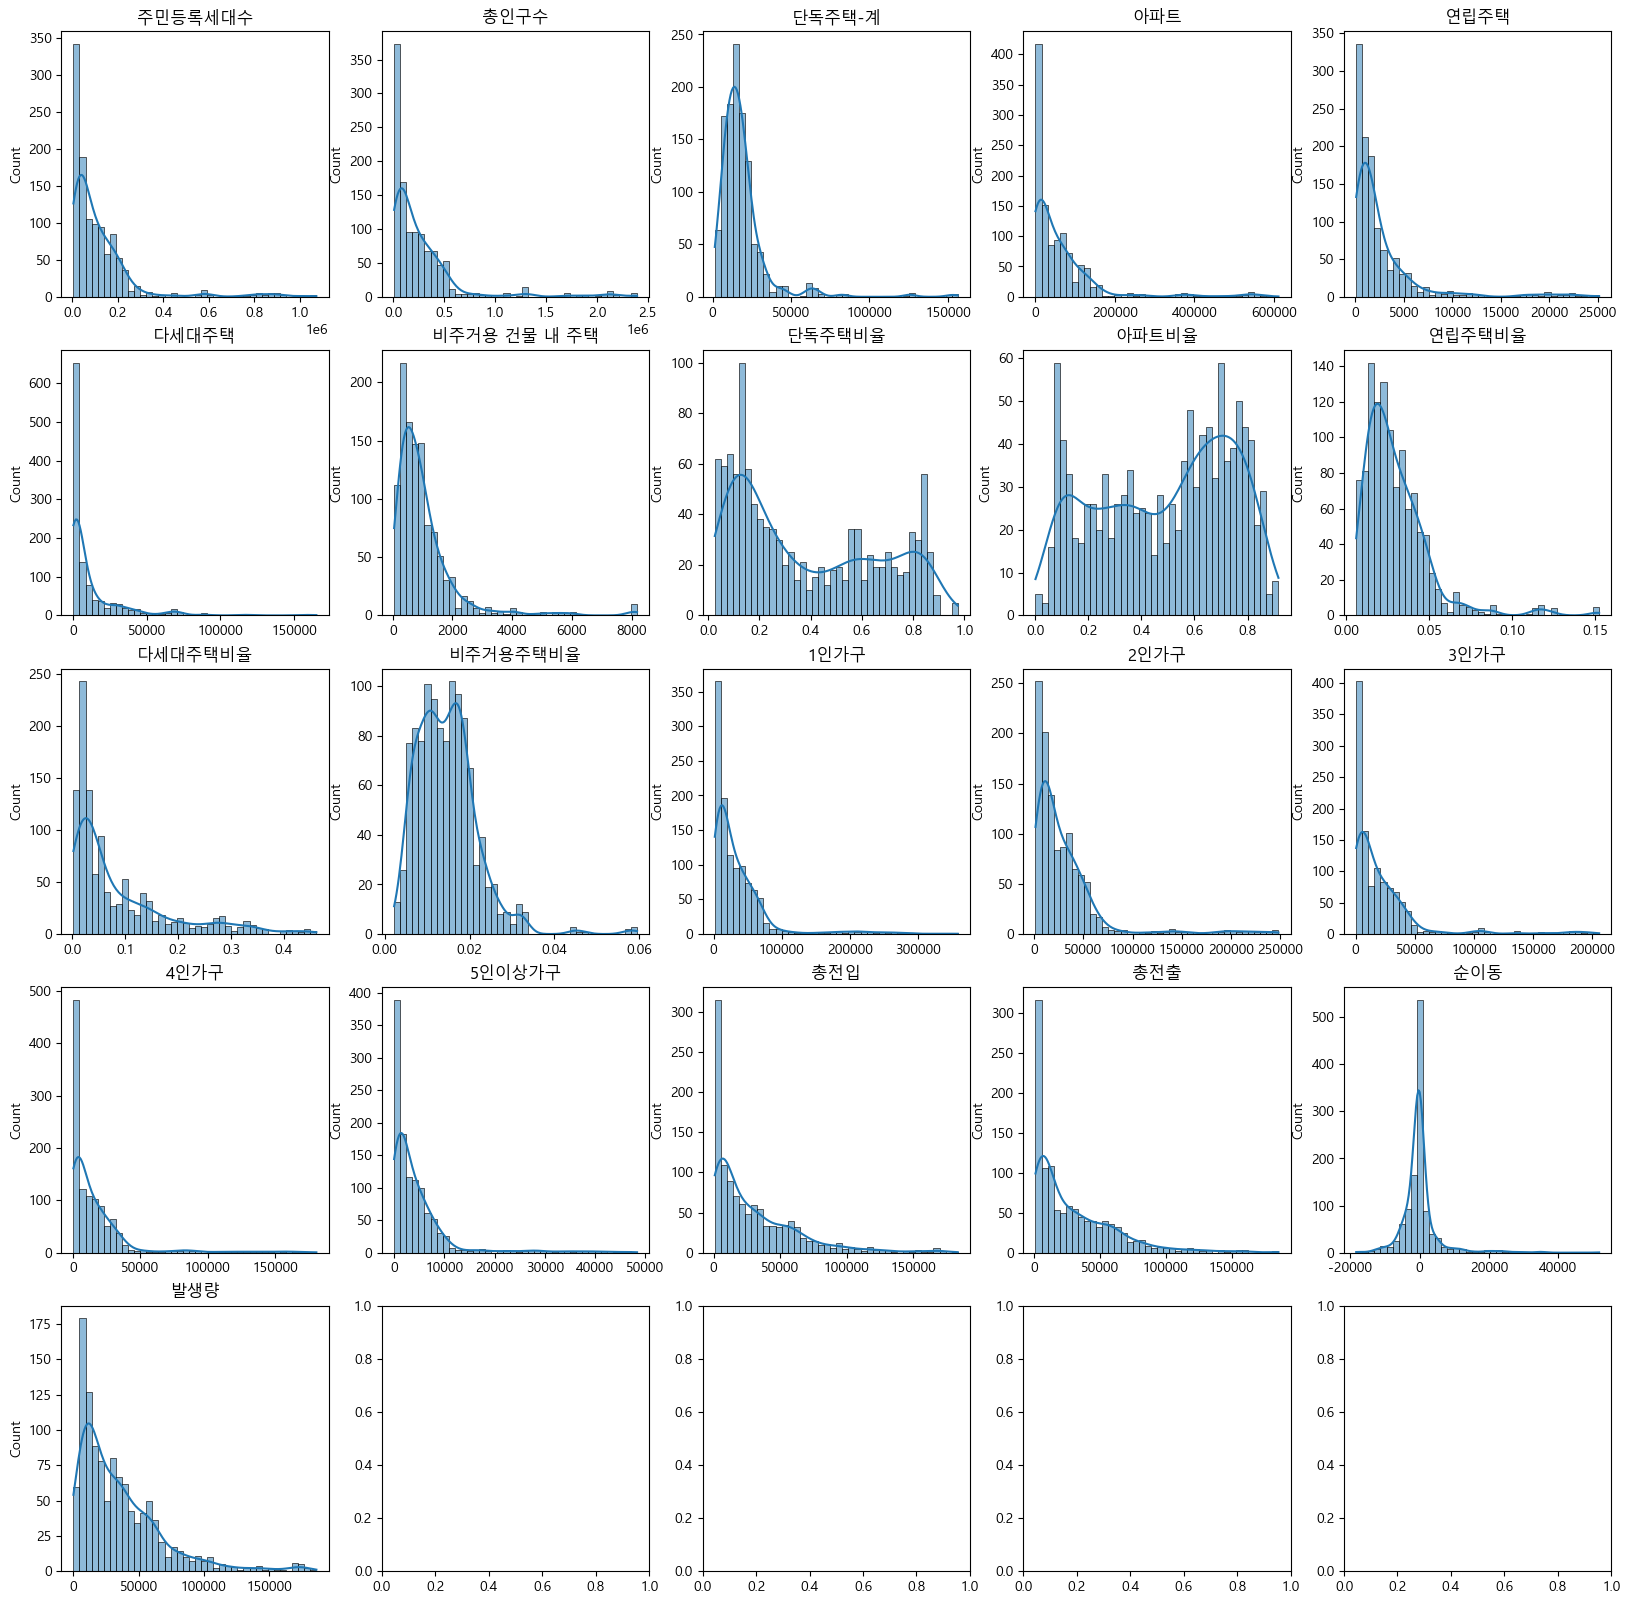

In [45]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(df_merged):
    sns.histplot(df_merged[column], bins=40, kde=True, ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')

plt.show()

'단독주택-계', '아파트', '연립주택', '다세대주택', '비주거용 건물 내 주택'  
-> '단독주택비율', '아파트비율', '연립주택비율', '다세대주택비율', '비주거용주택비율' 로 사용  

비율과 관련된 문제
이때는 단독주택비율 + 아파트비율 + 빌라비율 < 1이 되며, 나머지 비율은 '기타 주거 형태 비율'이 됩니다.  
이 경우 완전한 다중공선성은 아니지만, 여전히 세 변수 간에 높은 상관관계(부분적인 다중공선성)가 존재할 수 있습니다.  
높은 상관관계는 회귀 계수의 불안정성이나 해석의 어려움을 야기할 수 있습니다.  
이런 상황에서도 하나의 비율 변수를 제외하는 것이 가장 간단하고 효과적인 해결책입니다. 또는 앞서 언급했던  규제 회귀(Lasso)나 주성분 분석(PCA) 등을   고려할 수 있지만, 모델 해석이 더 복잡해질 수 있습니다.  

-> 상관관계를 그려서 몇개만 선정하자(이 방법이 완전히 다중공선성을 해결해주는 것은 아님)

In [54]:
df_merged.columns

Index(['주민등록세대수', '총인구수', '단독주택-계', '아파트', '연립주택', '다세대주택', '비주거용 건물 내 주택',
       '단독주택비율', '아파트비율', '연립주택비율', '다세대주택비율', '비주거용주택비율', '1인가구', '2인가구',
       '3인가구', '4인가구', '5인이상가구', '총전입', '총전출', '순이동', '발생량'],
      dtype='object')

In [75]:
df_merged_1 = df_merged[['주민등록세대수', '총인구수', '단독주택비율', '아파트비율', '연립주택비율', '다세대주택비율', '비주거용주택비율', '1인가구', '2인가구',
       '3인가구', '4인가구', '5인이상가구', '총전입', '총전출', '순이동', '발생량']]
df_merged_1

,주민등록세대수,총인구수,단독주택비율,아파트비율,연립주택비율,다세대주택비율,비주거용주택비율,1인가구,2인가구,3인가구,4인가구,5인이상가구,총전입,총전출,순이동,발생량
0,99086,213442,0.3437,0.5849,0.0340,0.0171,0.0202,32119,28629,16547,11083,3715.0,31980,30787,1193,38945.5
1,14445,27260,0.7582,0.1897,0.0094,0.0105,0.0322,3823,4076,1844,980,409.0,3096,3835,-739,10402.5
2,41141,90522,0.2689,0.6416,0.0426,0.0296,0.0173,10543,12086,7172,4833,1580.0,10516,11039,-523,29090.5
3,34082,67228,0.4359,0.4648,0.0510,0.0300,0.0184,10834,9732,4921,2874,1000.0,7491,8359,-868,31207.5
4,38689,81786,0.2367,0.6913,0.0415,0.0134,0.0171,11111,11193,6463,4163,1283.0,13034,12788,246,39310.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,66038,130194,0.3674,0.5593,0.0325,0.0173,0.0235,22837,20353,9307,5626,1777.0,14180,14237,-57,32360.0
1141,18944,37484,0.2407,0.6994,0.0276,0.0162,0.0161,6726,5056,2836,1816,604.0,3777,3493,284,8873.2
1142,42751,86254,0.2725,0.5969,0.0407,0.0787,0.0113,14420,11308,6400,4533,1450.0,9091,8697,394,18595.1
1143,798184,1704378,0.1933,0.7608,0.0145,0.0190,0.0124,286808,201436,137444,100140,27746.0,109399,106569,2830,172274.8


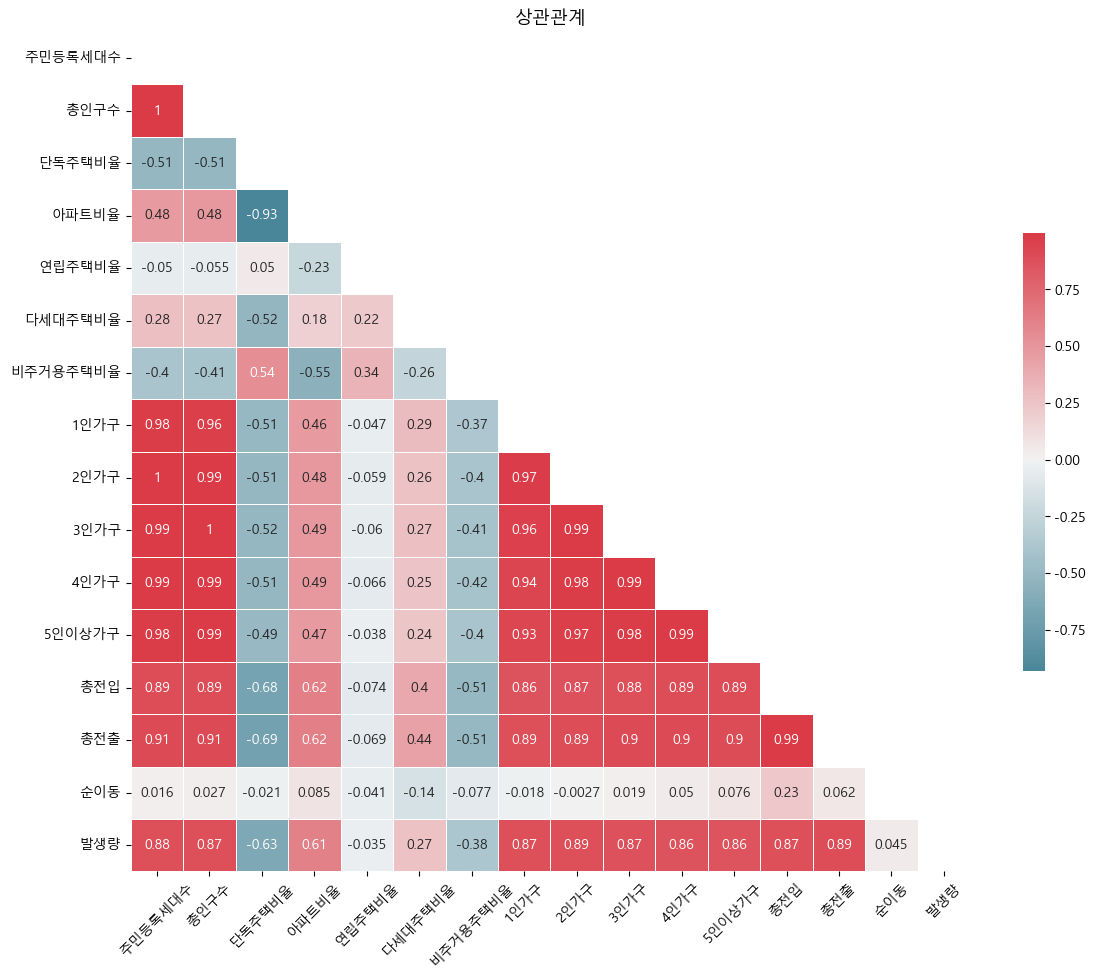

In [76]:
corr = df_merged_1.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) # 하단 삼각형만 남기
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True) # color 설
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5}) # color bar 크기 축소
plt.title('상관관계', fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()

- 순이동 = 총전입-총전출이기 때문에 총전출을 지워보자..!
- 연립주택비율, 다세대주택비율 삭제
- 가구 비율로 변경하고 1인가구만 남기기

In [112]:
df_merged['1인가구비율']=df_merged['1인가구']/(df_merged['1인가구']+df_merged['2인가구']+df_merged['3인가구']+df_merged['4인가구']+df_merged['5인이상가구'])

In [119]:
df_merged_2 = df_merged[['주민등록세대수','총인구수', '단독주택비율', '아파트비율', '비주거용주택비율', '1인가구비율', '총전입','순이동', '발생량']]
df_merged_2

,주민등록세대수,총인구수,단독주택비율,아파트비율,비주거용주택비율,1인가구비율,총전입,순이동,발생량
0,99086,213442,0.3437,0.5849,0.0202,0.348767,31980,1193,38945.5
1,14445,27260,0.7582,0.1897,0.0322,0.343424,3096,-739,10402.5
2,41141,90522,0.2689,0.6416,0.0173,0.291131,10516,-523,29090.5
3,34082,67228,0.4359,0.4648,0.0184,0.368993,7491,-868,31207.5
4,38689,81786,0.2367,0.6913,0.0171,0.324760,13034,246,39310.5
...,...,...,...,...,...,...,...,...,...
1140,66038,130194,0.3674,0.5593,0.0235,0.381252,14180,-57,32360.0
1141,18944,37484,0.2407,0.6994,0.0161,0.394765,3777,284,8873.2
1142,42751,86254,0.2725,0.5969,0.0113,0.378368,9091,394,18595.1
1143,798184,1704378,0.1933,0.7608,0.0124,0.380597,109399,2830,172274.8


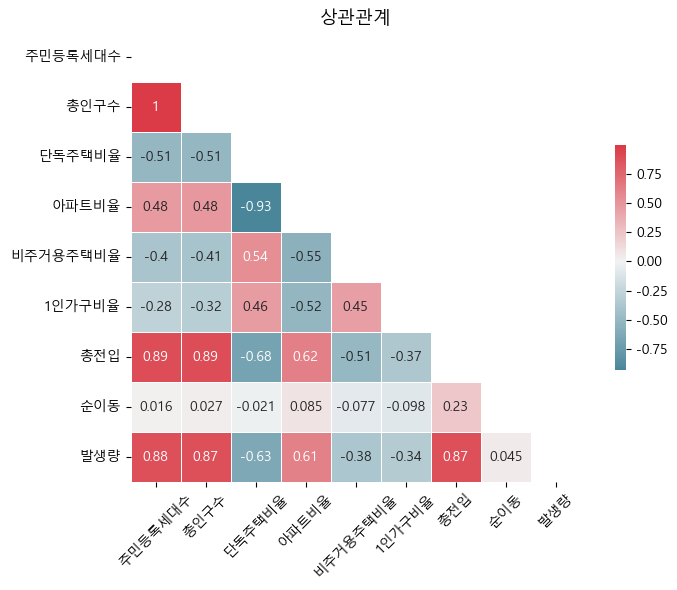

In [120]:
corr = df_merged_2.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) # 하단 삼각형만 남기
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True) # color 설
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5}) # color bar 크기 축소
plt.title('상관관계', fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()

- 주민등록세대수와 총인구수 중 하나만 남겨야할듯함
- 세대수, 인구수, 가구수는 모두 인구 관련 통계 지표이지만, 각각 다른 의미를 갖습니다. 세대수는 주민등록상 세대를 기준으로 하며, 실제 거주 형태와 다를 수 있습니다. 가구수는 실제로 생계를 같이 하는 사람들의 집단을 의미하며, 1인 가구도 포함됩니다. 인구수는 특정 지역에 거주하는 사람 전체의 수를 의미합니다. 

- 따라서 총인구수를 남겨보자..!
---
- 원본데이터에도 주택 아니면 아파트이기 때문에 아파트 비율을 남겨보자

In [129]:
df_merged_3 = df_merged[['총인구수', '아파트비율', '비주거용주택비율', '1인가구비율', '총전입', '순이동', '발생량']]

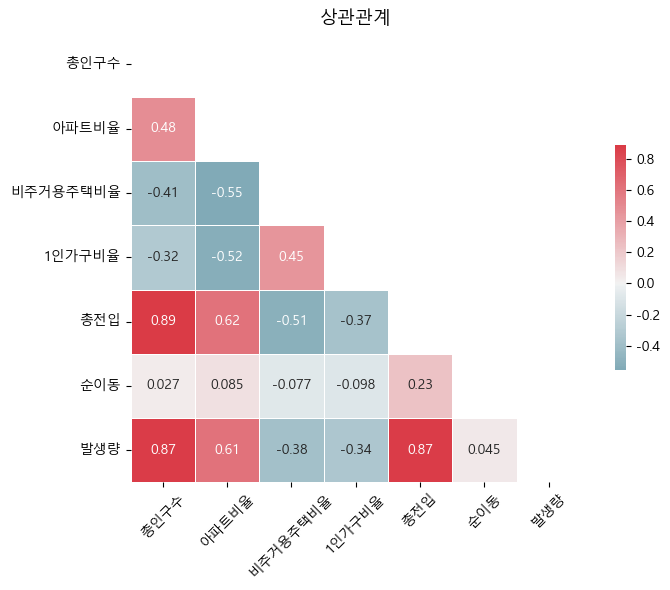

In [130]:
corr = df_merged_3.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) # 하단 삼각형만 남기
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True) # color 설
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5}) # color bar 크기 축소
plt.title('상관관계', fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()

- 최종 우려
  - 총전입과 총인구수의 상관관계가 너무 큼

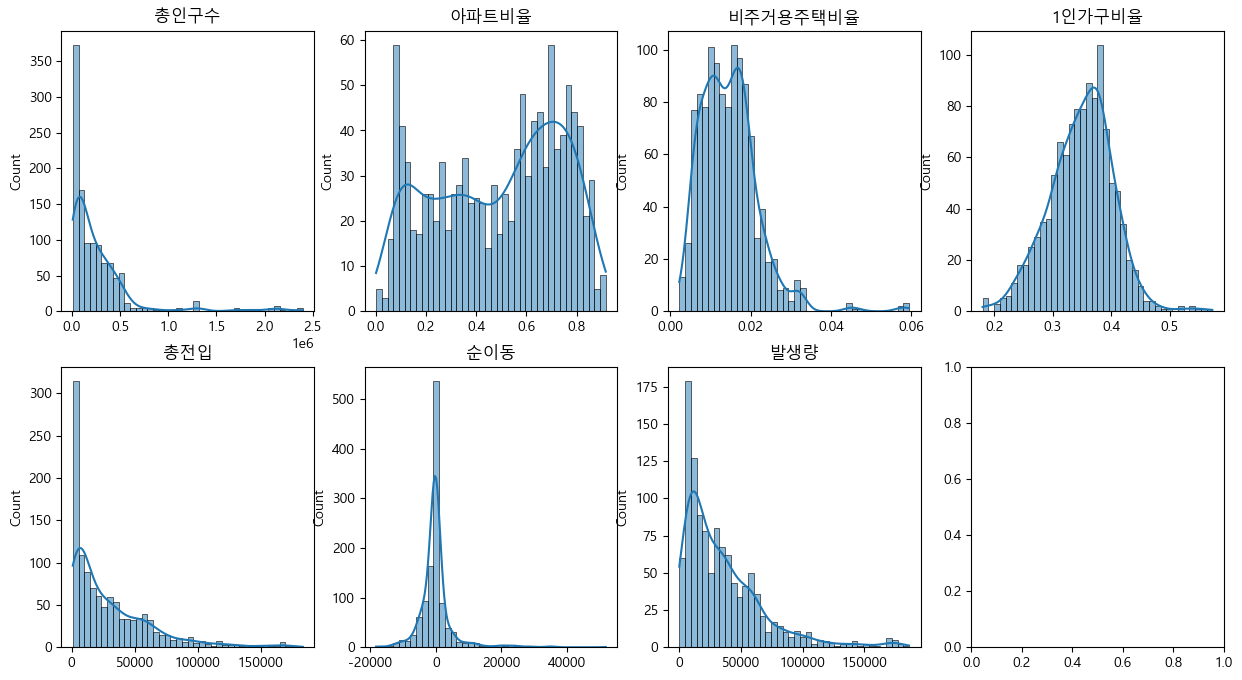

In [131]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axes = axes.flatten()

for i, column in enumerate(df_merged_3):
    sns.histplot(df_merged_3[column], bins=40, kde=True, ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')

plt.show()

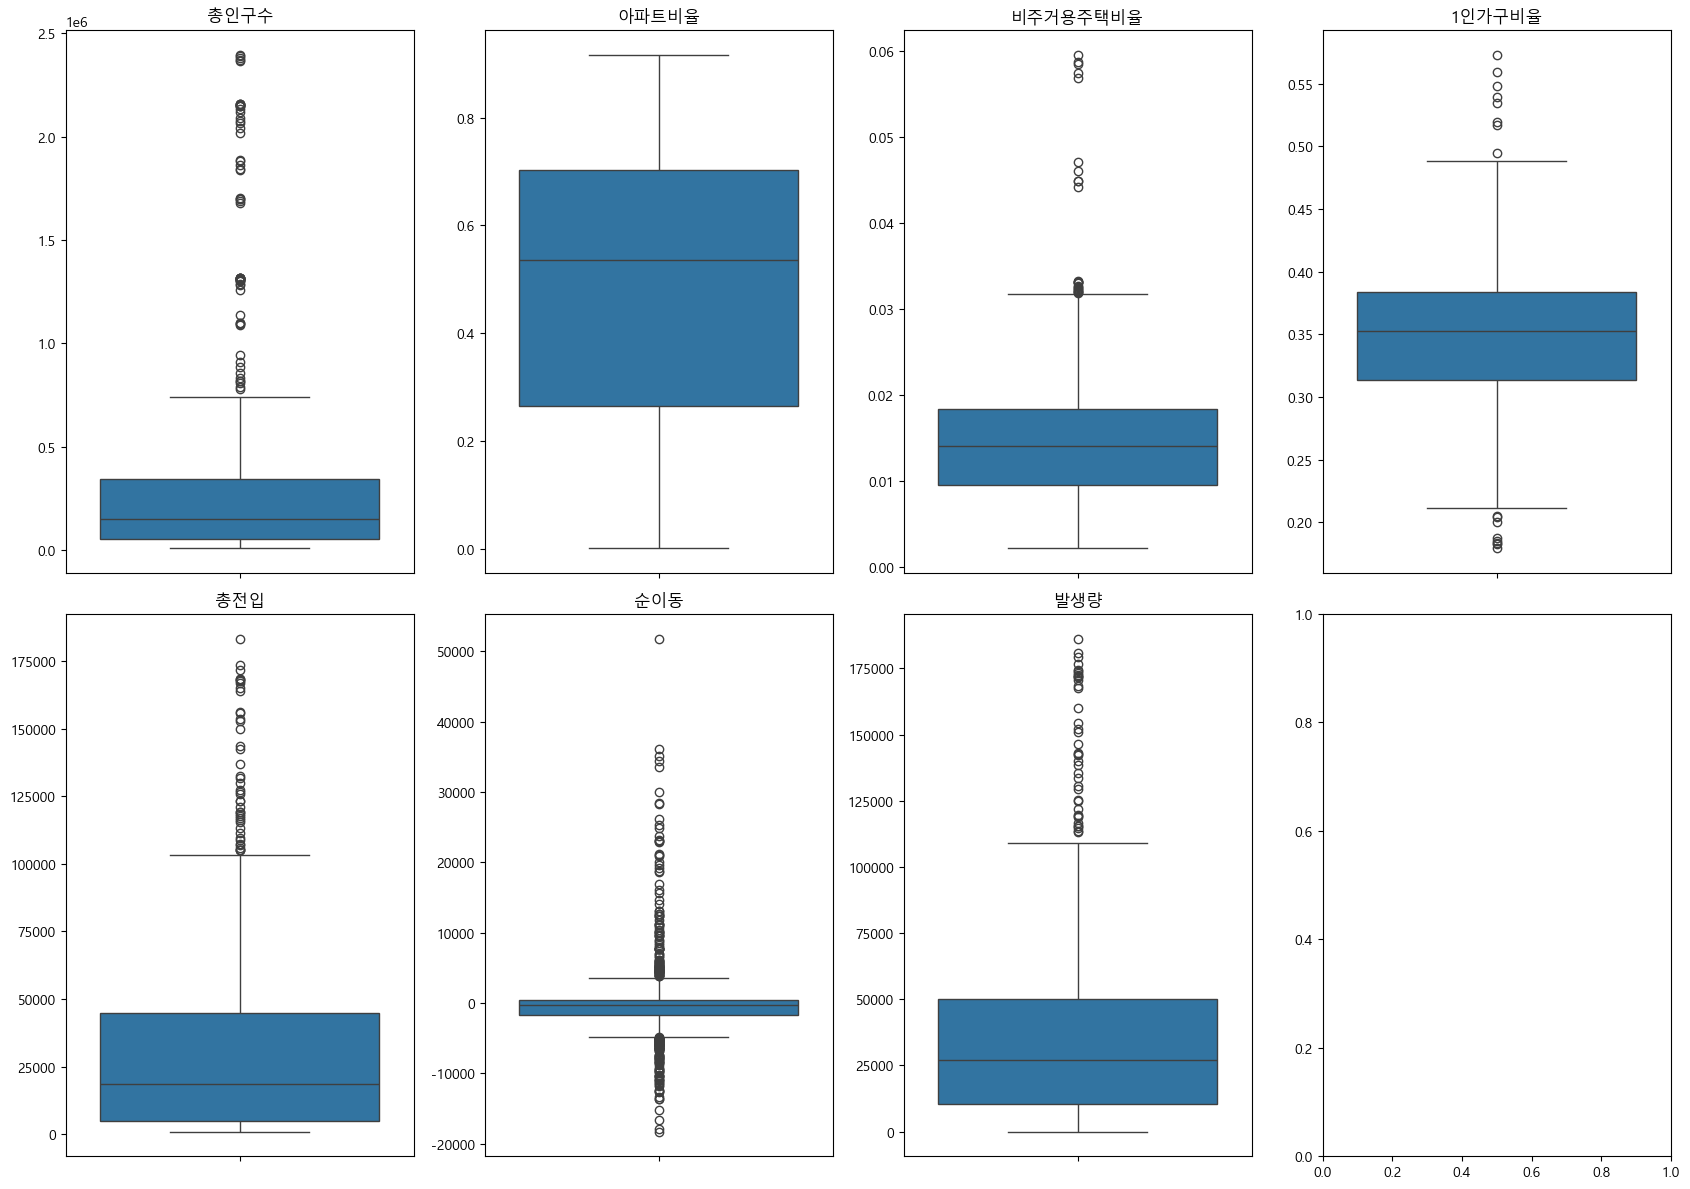

In [132]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17,12))
axes = axes.flatten()

for i, column in enumerate(df_merged_3):
  sns.boxplot(y=df_merged_3[column], ax = axes[i])
  axes[i].set_title(f'{column}')
  axes[i].set_ylabel('')


plt.tight_layout()
plt.show()

- 모든 피처가 시군구를 중심으로 모인 데이터기 때문에 편차가 큰 것이 너무 당연하므로 이상치 처리하지 않고 변환으로 넘어가기로 결정
- 이는 데이터에 오류가 있거나 잘못 입력된 것이 아니라, 단순히 분포의 한쪽 꼬리(tail)에 해당하는 실제 값일 가능성이 높음

# 로그 변환

### QQ-plot

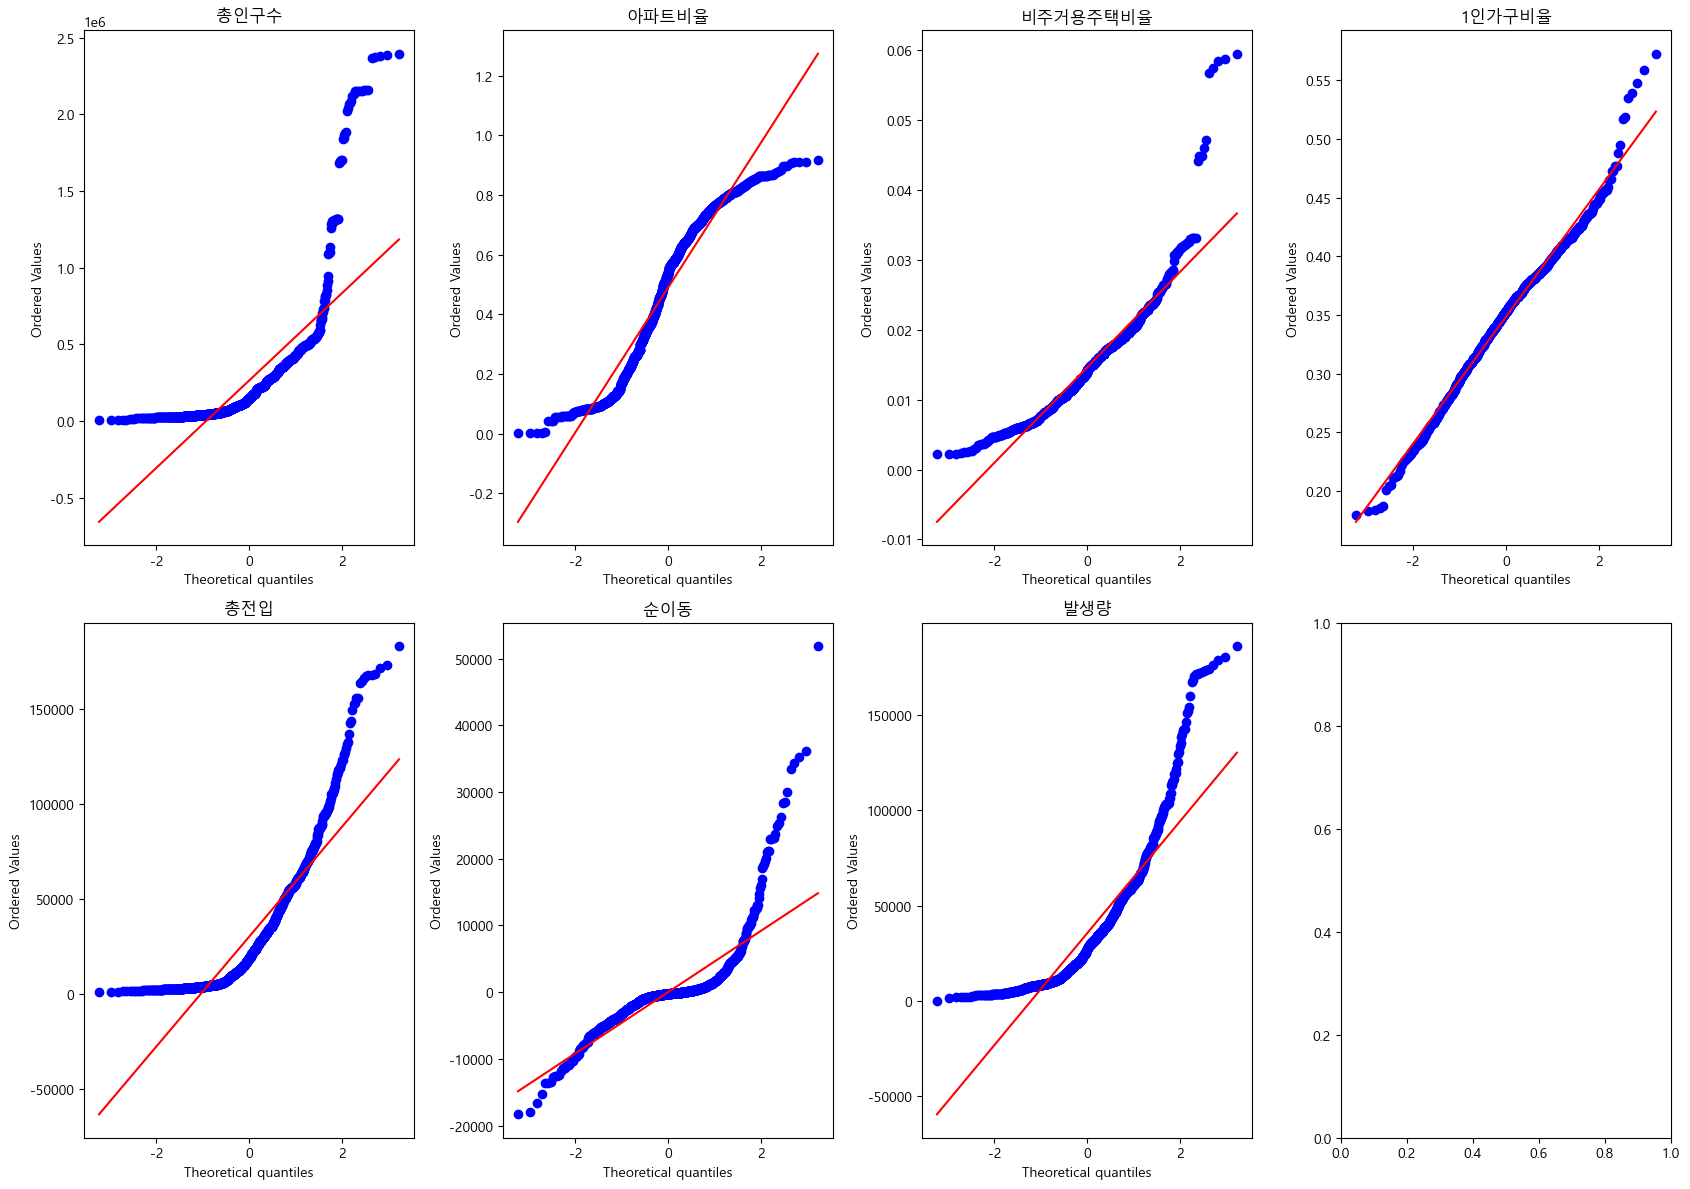

In [139]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17,12))
axes = axes.flatten()

for i, column in enumerate(df_merged_3):
  stats.probplot(df_merged_3[column], plot = axes[i])
  axes[i].set_title(f'{column}')

plt.tight_layout()
plt.show()

### Shapiro-Wilk 정규성 검정을 실시했는데 전부 H0 = 정규분포이다를 기각할수없음... 흠

In [153]:
shapiro_test = stats.shapiro(df_merged_3['순이동'])
shapiro_test

ShapiroResult(statistic=np.float64(0.7087452043537016), pvalue=np.float64(1.3545655728896994e-40))

In [155]:
df3_log = np.log(df_merged_3)

c:\workspace\busan\.venv\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\workspace\busan\.venv\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


- 순이동 음수값이 있어서 고려 X

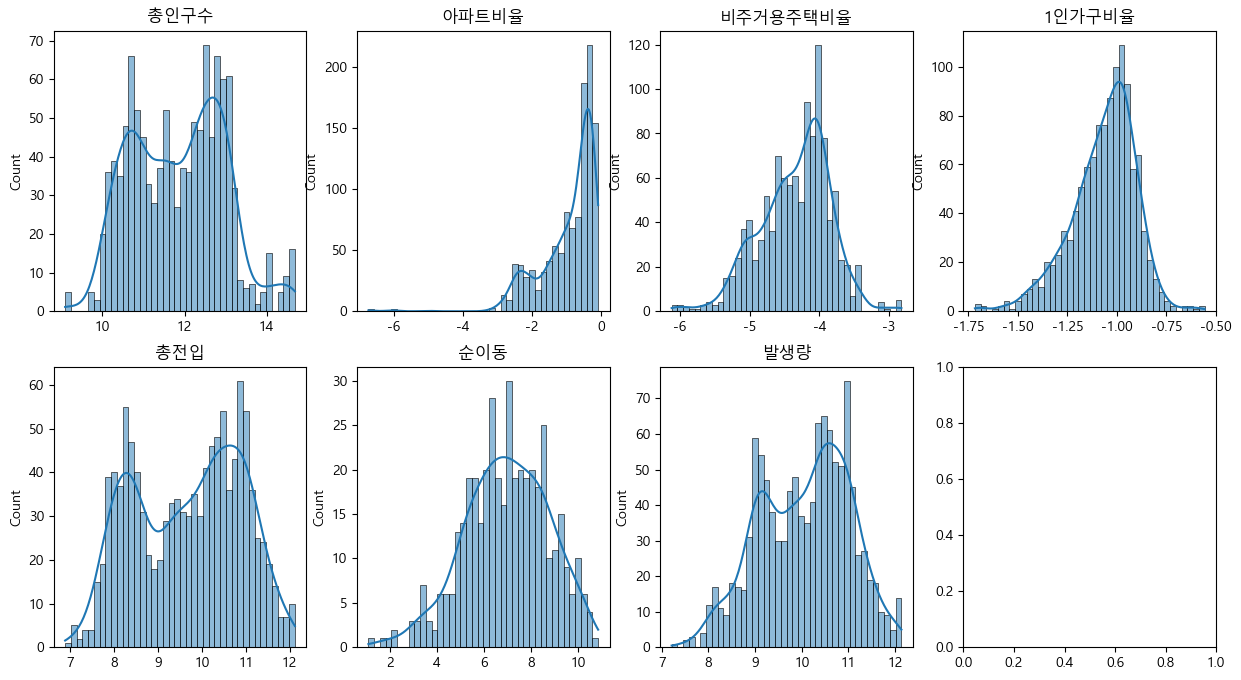

In [156]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axes = axes.flatten()

for i, column in enumerate(df3_log):
    sns.histplot(df3_log[column], bins=40, kde=True, ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')

plt.show()

c:\workspace\busan\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2888: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


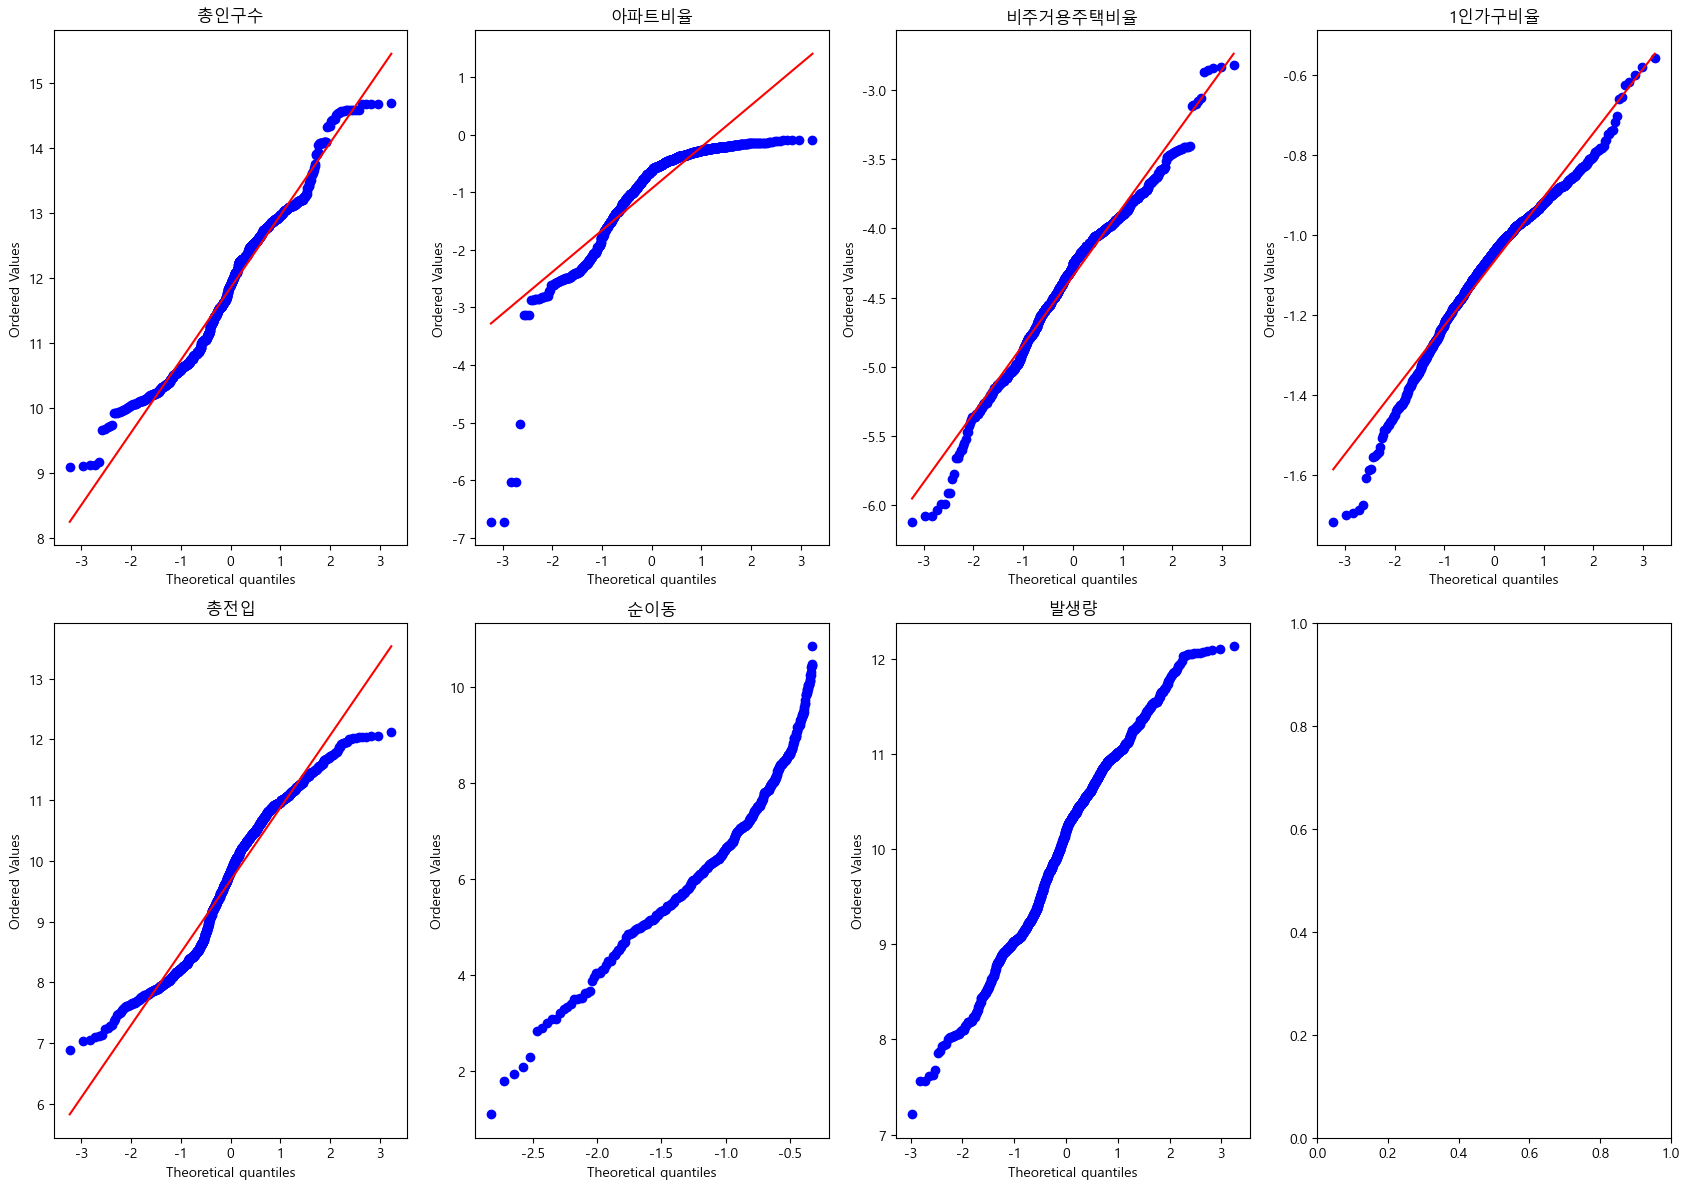

In [159]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17,12))
axes = axes.flatten()

for i, column in enumerate(df3_log):
  stats.probplot(df3_log[column], plot = axes[i])
  axes[i].set_title(f'{column}')

plt.tight_layout()
plt.show()

- 선택 : 총인구수 비주거용주택비율 총전입 발생량

In [165]:
# 비율이 아닌 총인구수와 총전입, 발생량에 0 이잇는지확인
df_merged_3[df_merged_3['발생량']==0]

,총인구수,아파트비율,비주거용주택비율,1인가구비율,총전입,순이동,발생량
171,46535,0.1013,0.0172,0.301025,5470,-43,0.0


In [173]:
df_y[(df_y['행정구역']=='전남_담양군')&(df_y['폐기물_종류']=='종량제방식 등 혼합배출')&(df_y['연도']==2019)]
# 해당 컬럼 삭제...! 다시 위에서부터하는거 까먹지말기

,행정구역,시도,시군구,폐기물_종류,폐기물_종류1,폐기물_종류2,재활용,소각,매립,기타,발생량,연도
6253,전남_담양군,전남,담양군,종량제방식 등 혼합배출,가연성,폐지류,0.0,0.0,0.0,0.0,0.0,2019
6254,전남_담양군,전남,담양군,종량제방식 등 혼합배출,가연성,폐합성수지류,0.0,0.0,0.0,0.0,0.0,2019
6255,전남_담양군,전남,담양군,종량제방식 등 혼합배출,가연성,폐고무류,0.0,0.0,0.0,0.0,0.0,2019
6256,전남_담양군,전남,담양군,종량제방식 등 혼합배출,가연성,폐섬유류,0.0,0.0,0.0,0.0,0.0,2019
6257,전남_담양군,전남,담양군,종량제방식 등 혼합배출,가연성,음식물류 폐기물,0.0,0.0,0.0,0.0,0.0,2019
6258,전남_담양군,전남,담양군,종량제방식 등 혼합배출,가연성,폐목재류,0.0,0.0,0.0,0.0,0.0,2019
6259,전남_담양군,전남,담양군,종량제방식 등 혼합배출,가연성,기타,0.0,0.0,0.0,0.0,0.0,2019
6260,전남_담양군,전남,담양군,종량제방식 등 혼합배출,불연성,폐금속류,0.0,0.0,0.0,0.0,0.0,2019
6261,전남_담양군,전남,담양군,종량제방식 등 혼합배출,불연성,폐유리류,0.0,0.0,0.0,0.0,0.0,2019
6262,전남_담양군,전남,담양군,종량제방식 등 혼합배출,불연성,폐토사류,0.0,0.0,0.0,0.0,0.0,2019


---
- 여기서 부터 내일 수정

In [160]:
df3_log1 = np.log1p(df_merged_3)
# 마찬가지로 순이동은 보지않음

c:\workspace\busan\.venv\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


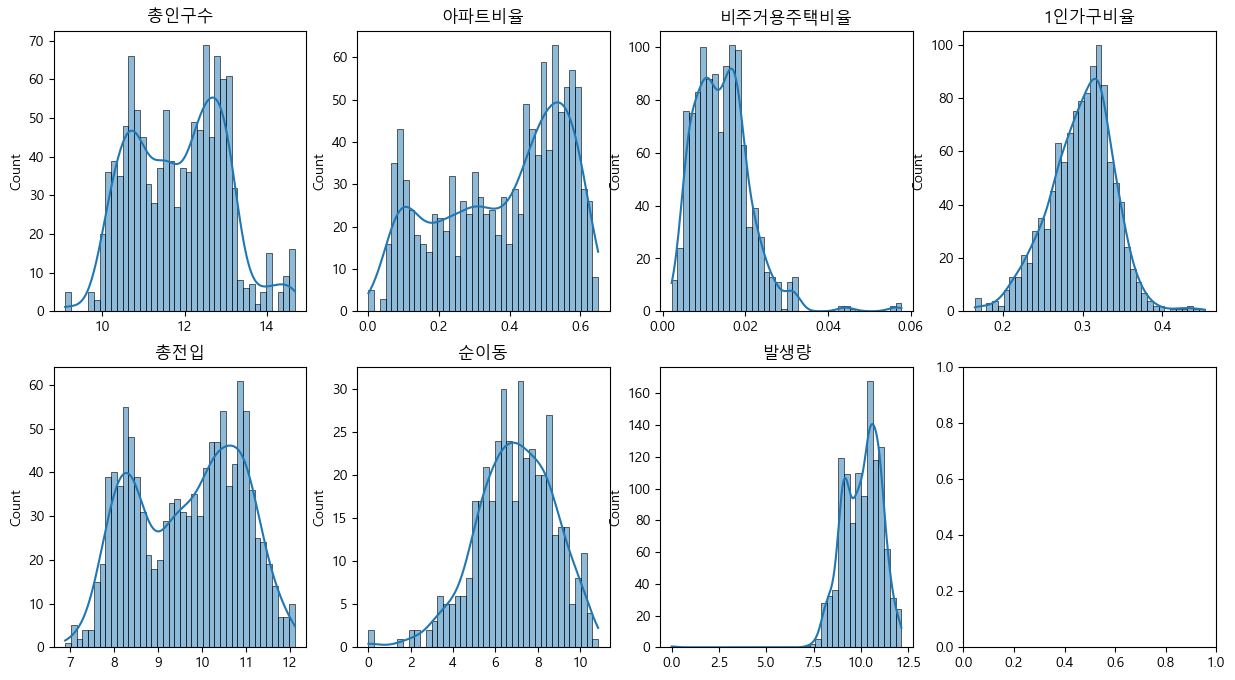

In [161]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axes = axes.flatten()

for i, column in enumerate(df3_log1):
    sns.histplot(df3_log1[column], bins=40, kde=True, ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')

plt.show()

c:\workspace\busan\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2888: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


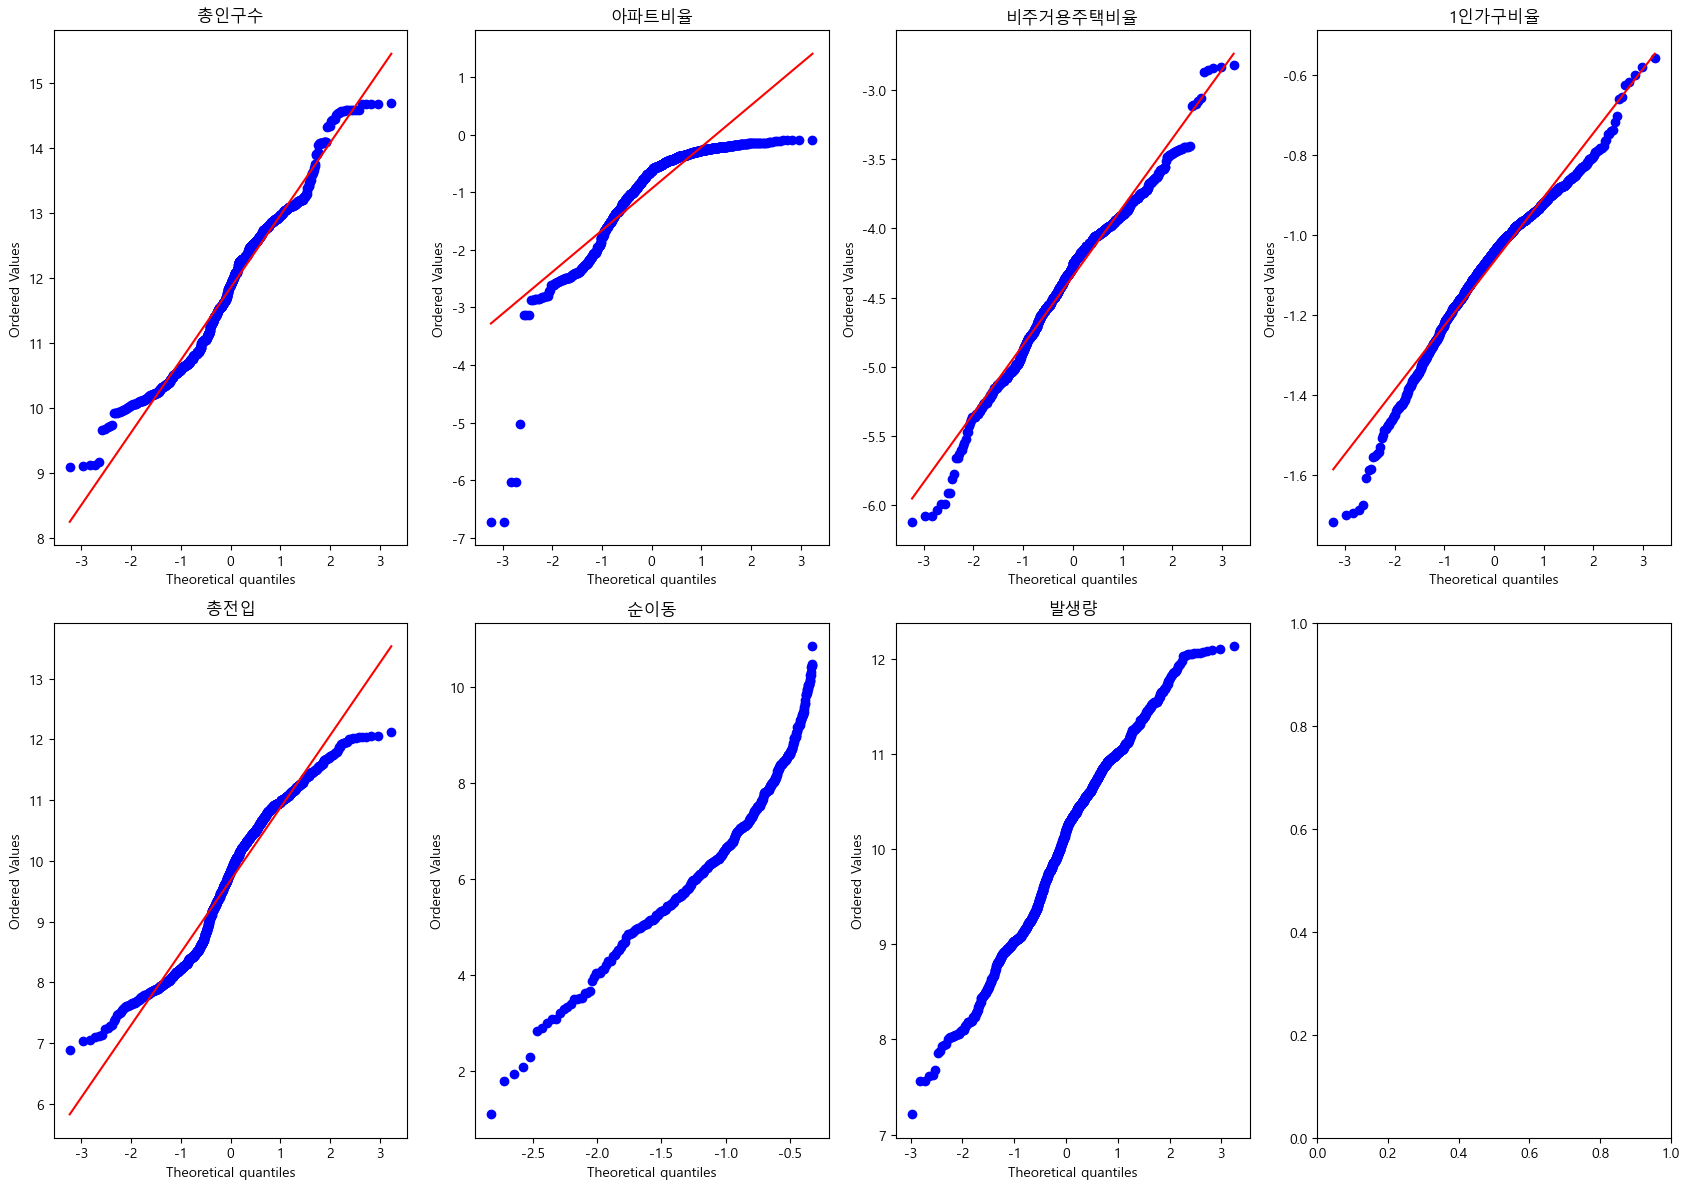

In [162]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17,12))
axes = axes.flatten()

for i, column in enumerate(df3_log):
  stats.probplot(df3_log[column], plot = axes[i])
  axes[i].set_title(f'{column}')

plt.tight_layout()
plt.show()

In [ ]:
np.log1p()